#### import package

In [1]:
# Import standard packages
%matplotlib notebook
import matplotlib.pyplot as plt
plt.ioff() # turn off interactive plotting mode
import numpy as np
import pandas as pd
# Xarray is conventionally imported as 'xr'
import xarray as xr

#### open dataset

In [2]:
#open dataset
ds_flat_bottom=xr.open_dataset('~/case1/swm.cdf')
ds_var_bottom=xr.open_dataset('~/case2/swm.cdf')

In [3]:
ds_flat_bottom

<xarray.Dataset>
Dimensions:  (time: 60, ypos: 500, xpos: 500)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-01T00:59:00
Dimensions without coordinates: ypos, xpos
Data variables:
    d        (ypos, xpos) float32 ...
    u        (time, ypos, xpos) float32 ...
    v        (time, ypos, xpos) float32 ...
    h        (time, ypos, xpos) float32 ...
Attributes:
    experiment:  swmPexperimentbase_dateAllocation would exceed memory limitA...
    base_date:   [2021    1    1]

### animation part

In [4]:
#animation part
from matplotlib import animation
fig, ax = plt.subplots()
#ax.contourf(lon,lat,air[0,:,:])
def animate(i): # i represents one frame in the animation
    data = ds_flat_bottom.h[i,:,:] # slice data advancing one timestep
    ax.cla()
    data.plot(ax=ax, cmap="RdYlBu_r", add_colorbar=False, vmin=-2, vmax=2)

<IPython.core.display.Javascript object>


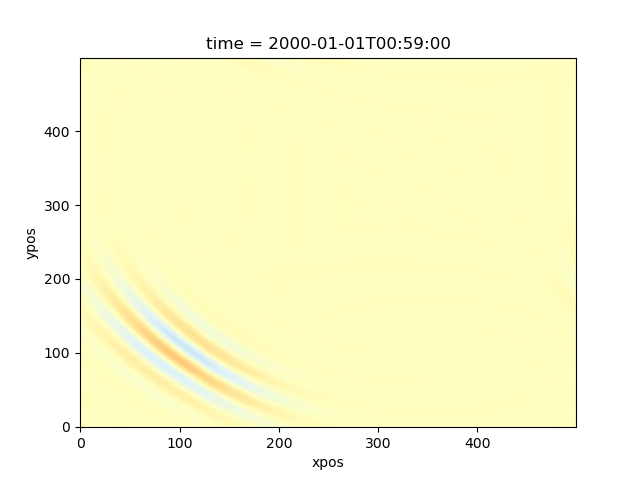

In [5]:
# Instantiate the animator.
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=60, # 12 frames = 12 months
                               interval=200, # 200 milliseconds interval between each frame
                               blit=False, repeat=False) # for blit=True, only the changes are plotted
plt.show()

### Wave propagation part

<IPython.core.display.Javascript object>


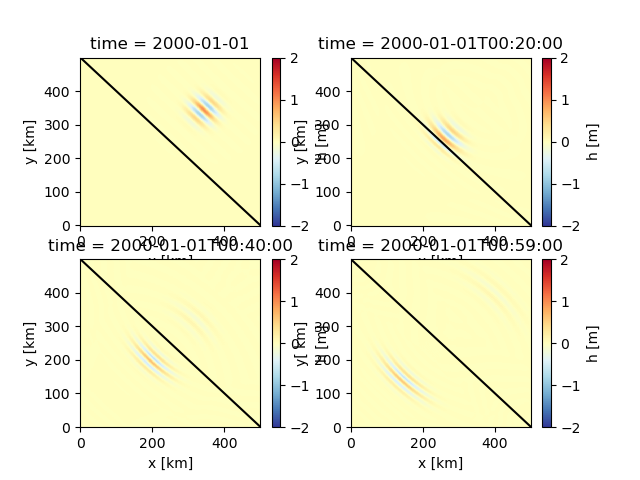

In [6]:
plt.subplot(2,2,1)
ds_var_bottom.h[0,:,:].plot(cmap="RdYlBu_r", vmin=-2, vmax=2)
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.plot([500,0],[0,500],'k-')

plt.subplot(2,2,2)
ds_var_bottom.h[20,:,:].plot(cmap="RdYlBu_r", vmin=-2, vmax=2)
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.plot([500,0],[0,500],'k-')

plt.subplot(2,2,3)
ds_var_bottom.h[40,:,:].plot(cmap="RdYlBu_r", vmin=-2, vmax=2)
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.plot([500,0],[0,500],'k-')

plt.subplot(2,2,4)
ds_var_bottom.h[59,:,:].plot(cmap="RdYlBu_r", vmin=-2, vmax=2)
plt.xlabel('x [km]')
plt.ylabel('y[ km]')
plt.plot([500,0],[0,500],'k-')

plt.show()
plt.savefig("swm__var_bottom"+".png")





Wave propagation part

<IPython.core.display.Javascript object>


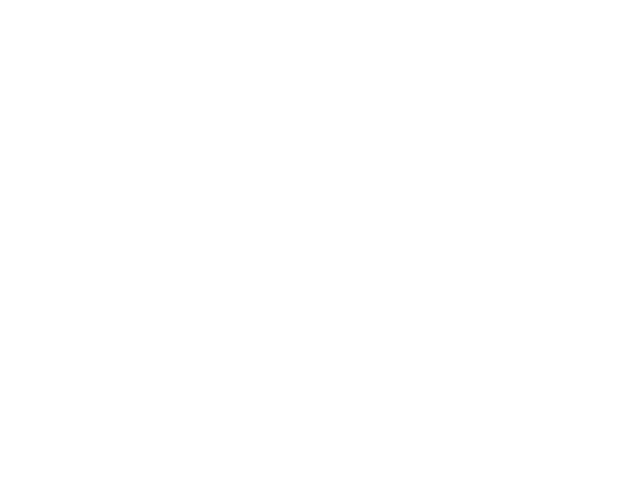

<IPython.core.display.Javascript object>


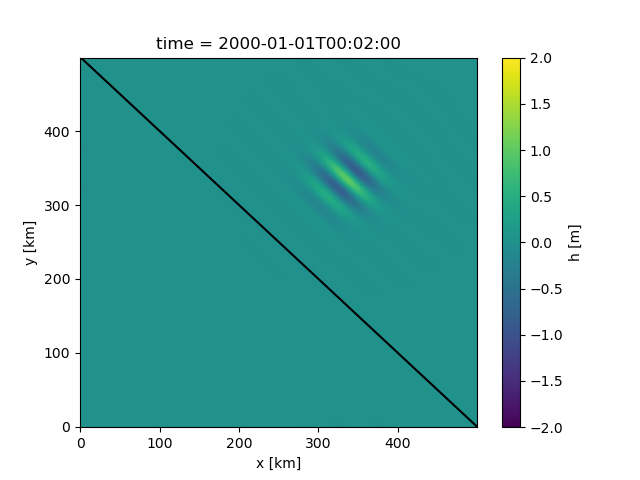

<IPython.core.display.Javascript object>


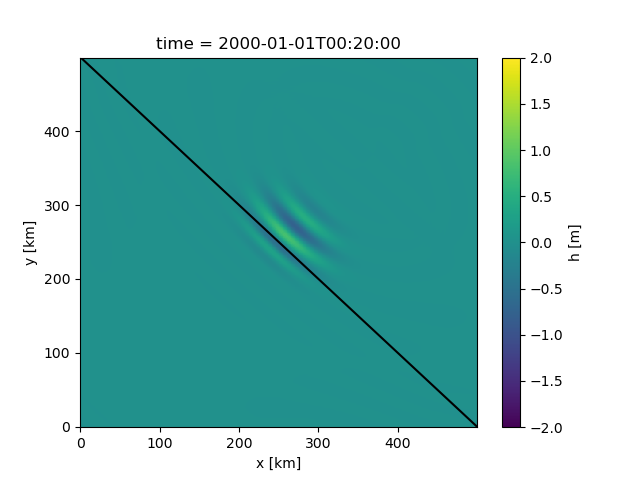

<IPython.core.display.Javascript object>


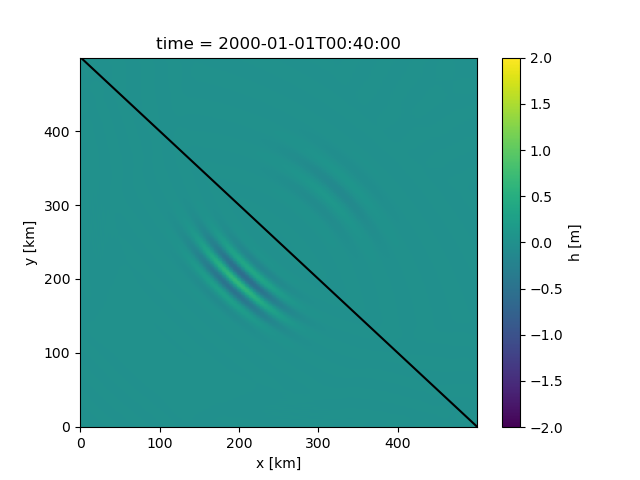

<IPython.core.display.Javascript object>


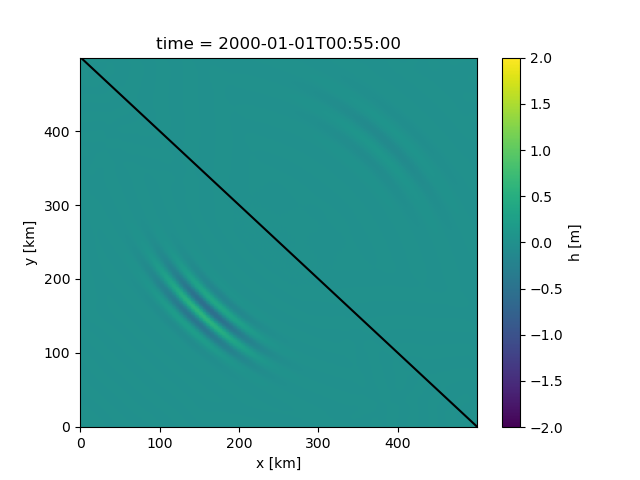

In [7]:
dumpsteps=[2,20,40,55]
for timestep in dumpsteps:
    plt.figure()
    ds_var_bottom.h[timestep,:,:].plot(vmin=-2,vmax=2)
    plt.plot([500,0],[0,500],"k-")
    plt.xlabel("x [km]")
    plt.ylabel("y [km]")
    plt.savefig("swm_var_bottom"+str(timestep)+".png")
plt.show()

<IPython.core.display.Javascript object>


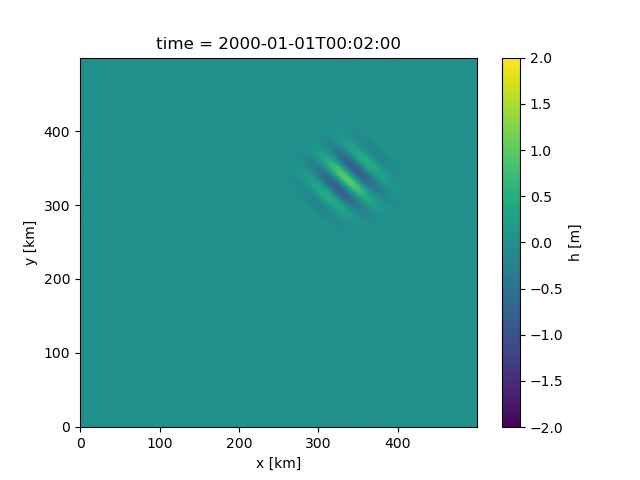

<IPython.core.display.Javascript object>


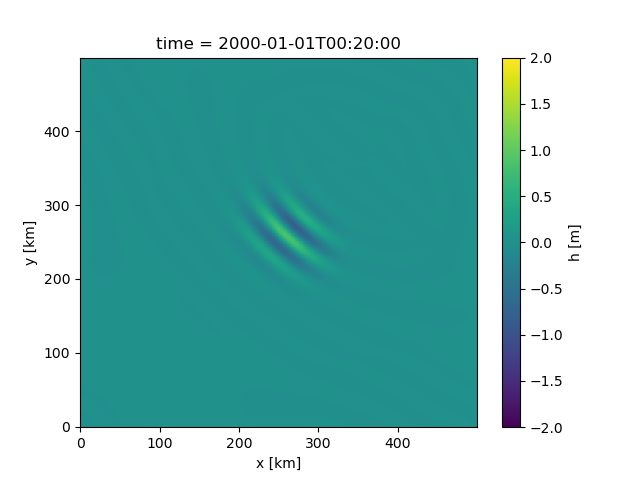

<IPython.core.display.Javascript object>


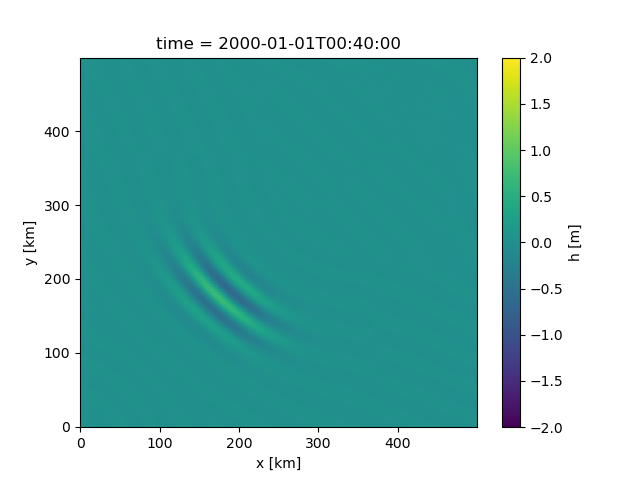

<IPython.core.display.Javascript object>


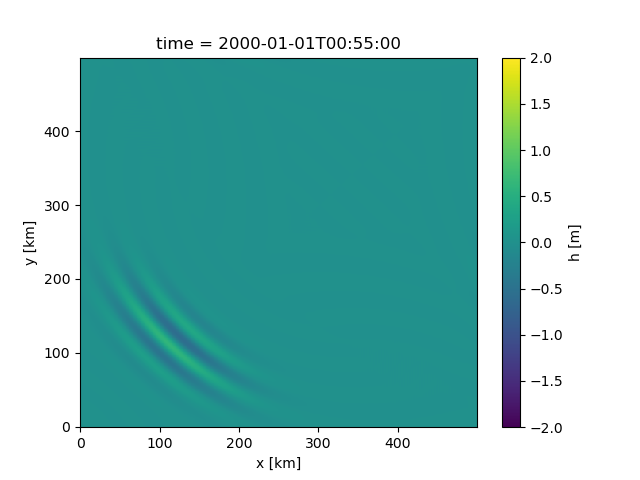

In [8]:
for timestep in dumpsteps:
    plt.figure()
    ds_flat_bottom.h[timestep,:,:].plot(vmin=-2,vmax=2)
    plt.xlabel("x [km]")
    plt.ylabel("y [km]")
    plt.savefig("swm_flat_bottom"+str(timestep)+".png")
plt.show()

####Produce Hovmoeller diagrams for each experiment 

In [9]:
h_flat_diag=np.zeros((60,500))
h_var_diag=np.zeros((60,500))
u_var_diag=np.zeros((60,500))
for i in range(500):
    h_flat_diag[:,i]=(ds_flat_bottom.h[:,i,i]);
    h_var_diag[:,i]=(ds_var_bottom.h[:,i,i])
    u_var_diag[:,i]=(ds_var_bottom.u[:,i,i])

<IPython.core.display.Javascript object>


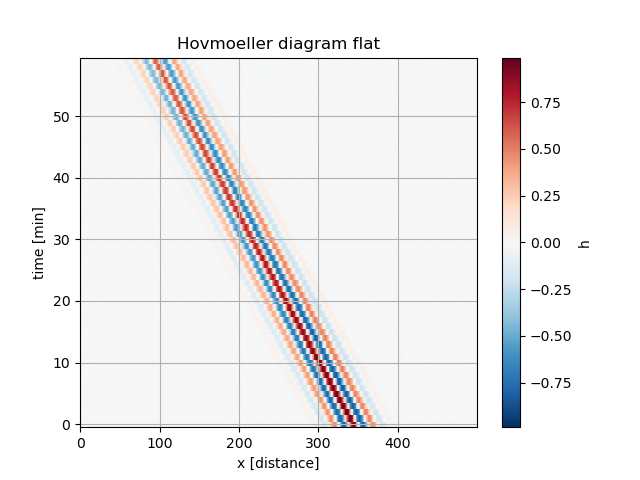

In [10]:
ds_flat_diag=xr.Dataset(data_vars={'h':(['time','xpos'],h_flat_diag)})
ds_flat_diag.h.plot()
plt.title('Hovmoeller diagram flat')
plt.xlabel('x [distance]')
plt.ylabel('time [min]')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


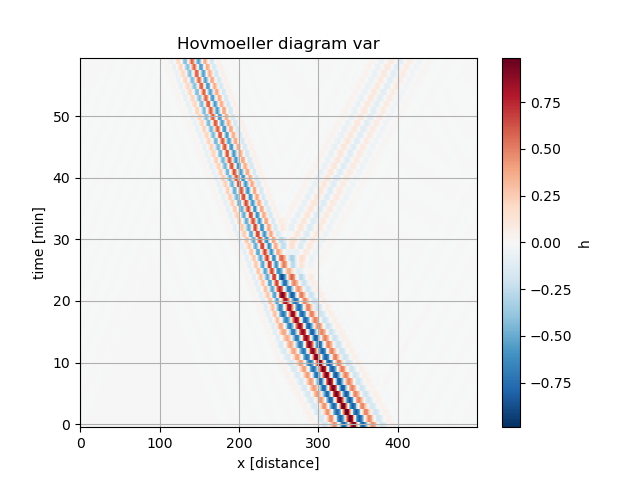

In [11]:
ds_var_diag=xr.Dataset(data_vars={'h':(['time','xpos'],h_var_diag)})
ds_var_diag.h.plot()
plt.title('Hovmoeller diagram var')
plt.xlabel('x [distance]')
plt.ylabel('time [min]')
plt.grid()
plt.show()

### u Hovomoller diagram

<IPython.core.display.Javascript object>


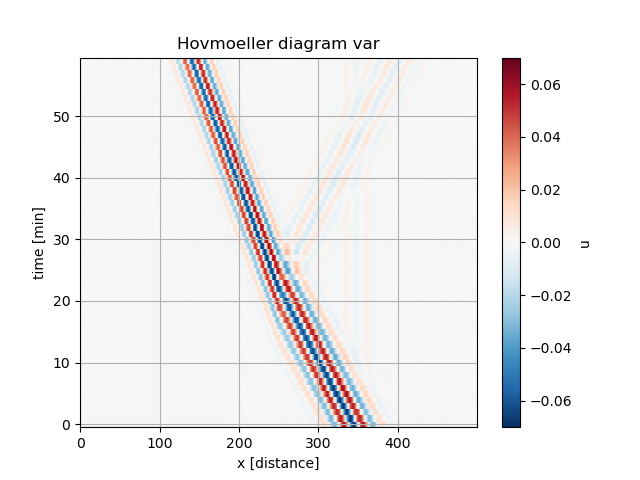

In [12]:
ds_u_var_diag=xr.Dataset(data_vars={'u':(['time','xpos'],u_var_diag)})
ds_u_var_diag.u.plot()
plt.title('Hovmoeller diagram var')
plt.xlabel('x [distance]')
plt.ylabel('time [min]')
plt.grid()
plt.show()

In [13]:
#phase speed formula
#phase speed =distance*sqrt(2)*1000m/(60*60)
(350-100)*np.sqrt(2)*1000/(60*60)

98.20927516479827

### wave period

<IPython.core.display.Javascript object>


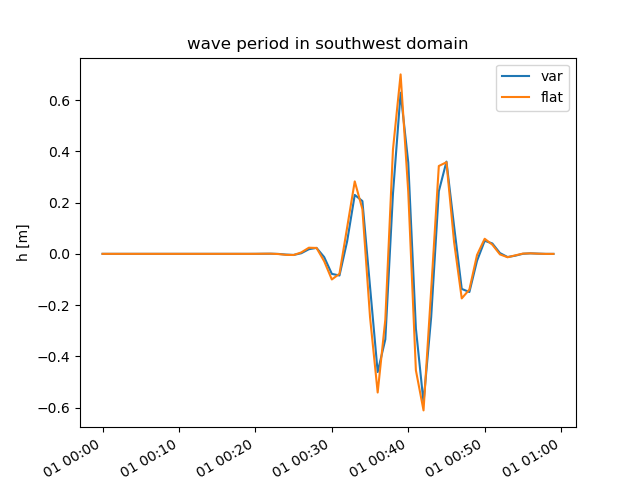

In [14]:
ds_var_bottom.h[:,200,200].plot.line()
ds_flat_bottom.h[:,180,180].plot.line()
plt.xlabel('time')
plt.ylabel('h [m]')
plt.title('wave period in southwest domain')
plt.legend(('var','flat'))
plt.show()

### wave length

<IPython.core.display.Javascript object>


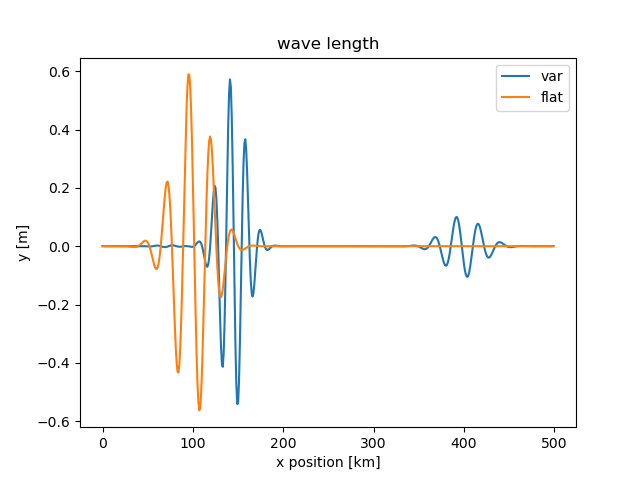

In [15]:
ds_var_diag['h'][-1,:].plot.line(x='xpos')
ds_flat_diag['h'][-1,:].plot.line(x='xpos')
plt.xlabel('x position [km]')
plt.ylabel('y [m]')
plt.title('wave length')
plt.legend(('var', 'flat'))
plt.show()
